### Цель

<br>1. Определить оптимальный алгоритм класстеризации;</br>
<br>2. Оптимальную метрику кластеризации;</br>
<br>3. Определить характеристики выделенного кластера;</br>

In [1]:
# импортирую библиотеки
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import re

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_score


### Функции применяемые в ходе работы

In [2]:
# функция визуализаии графика изменения Силуэта для алгоритма в зависимости от числа n_clusters
def fun_ploting_silhouette_score(sil_arg, optimal_number_clusters_arg, name_alg, size=(8, 8)):
    sns.set(rc={'figure.figsize':size})

    plot_y, plot_x = [i[0] for i in sil_arg], [i[1] for i in sil_arg]
    plt.plot(plot_x, plot_y)
    plt.xlabel("K");
    plt.ylabel("Silhouette");
    plt.title(label=name_alg)
    plt.scatter(x=max(sil_arg)[1], y=max(sil_arg)[0], marker='o', c='r')
    plt.annotate(s='{label}'.format(label=optimal_number_clusters_arg),
                 xy=(optimal_number_clusters_arg[1] + 0.0005, optimal_number_clusters_arg[0] + 0.0005))
    
# функция для разделения данных на X и y, выделяет sample n-размера
def creat_x_and_y(data_arg, target, n=1000):
    if n > data_arg.shape[0]:
        print('Значение n(={f_n}) привышает размер данных data_arg(={f_shape_data_arg}.\n\
Установлено n по умолчанию n=1000)'.format(f_n=n, f_shape_data_arg=data_arg.shape[0]))
        n = 1000
    
    # выделяю sample для работы размером в 20 000 объектов
    data = all_data.sample(n=n, random_state=10)
    X = data.drop(columns=target)
    y = data.open_account_flg.to_frame()
    return data, X, y


# функция для визуализации кластеров
def plot_cluster(hue_ag, X_arg, number_cluster, size=(8,8), name_alg_arg=''):
    

    sns.set(rc={'figure.figsize':size})
    palette = sns.hls_palette(number_cluster, l=.4, s=.9)
    
    sns.scatterplot(x=X_arg[:, 0], y=X_arg[:, 1], palette=palette,
                    hue=hue_ag)
    
    plt.title(label='{name_alg} number_cluster = {n}'.format(name_alg=name_alg_arg, n=number_cluster))
    
# функция для определения оптимального числа класстеров fun_silhouette_score через силуэт
# возвражает список ввиде (silhouette_score, n_clusters)
def fun_silhouette_score(Alg_Clust, X_arg, p=10):   
    return [(silhouette_score(X=X_arg, labels=Alg_Clust(n_clusters=i).fit_predict(X_arg)), i) for i in range(2, p)]


# функция определяет силуэт и для заданного числа кластеров, строит график изминения силуэт от числа кластеров
# возвращает число кластеров для оптимального значения silhouette_score
def fun_determine_optimal_number_clusters(Alg_Clust, X_arg, p=10, name_alg=''):
    
    # p - предел посика числа кластеров
    # определение силуэта и оптимального числа кластеров
    
    sil = fun_silhouette_score(Alg_Clust=Alg_Clust, X_arg=X_arg, p=p) # список кортежей (silh, n_clusters)
    
    optimal_number_clusters = max(sil) # n_clusters самого max силуэт 
    
    # построение графика
    fun_ploting_silhouette_score(sil_arg=sil,
                                 optimal_number_clusters_arg=optimal_number_clusters,
                                 name_alg=name_alg)
    return optimal_number_clusters[1]


# Функция для Standart Scaling
def fun_standart_scaling(data_arg, continuous_variable_names_arg=None):
    data_s = data_arg.copy()
    scaler = StandardScaler()
    if continuous_variable_names_arg is None:
        # c - это список столюов, в котором не содержится бинарных значений 
        c = [i for i in data_arg.columns if not (np.array_equal(np.sort(pd.unique(data_arg[i])), [0, 1]))]
        scaler_data = data_arg[c]
        scaler_data = pd.DataFrame(scaler.fit_transform(scaler_data), columns=scaler_data.columns)

        for i in scaler_data.columns:
            data_s[i] = scaler_data[i].values
        return data_s, scaler, c
    else:
        scaler_data = data_arg[continuous_variable_names_arg]
        scaler_data = pd.DataFrame(scaler.fit_transform(scaler_data), columns=scaler_data.columns)
        for i in scaler_data.columns:
            data_s[i] = scaler_data[i].values
        return data_s, scaler


# Функция для обратной операции стандартизации
def fun_reverse_standardization(scaler, not_binaries_features, data):
    rescaler_data = pd.DataFrame(scaler.inverse_transform(data[not_binaries_features]), columns=not_binaries_features)
    result_data = data.copy()
    for i in rescaler_data.columns:
        result_data[i] = rescaler_data[i].values
    return result_data


# Функция визуализирующая изменение метрики в зависимости от числа кластеров для алгоритма или алгоритмов
# def fun_visualizing_metric_change()

### Загрузка данных

In [3]:
link = r"C:\Users\Asus\Jupyter Lab\Home work with ITA\credit_train_after_processing.csv"
all_data = pd.read_csv(filepath_or_buffer=link, index_col='Unnamed: 0')
all_data.head()

gender_M  gender_F   age  marital_status_WID  marital_status_UNM  \
0         1         0  34.0                   0                   0   
1         0         1  34.0                   0                   0   
2         1         0  32.0                   0                   0   
3         0         1  27.0                   0                   0   
4         1         0  45.0                   0                   0   

   marital_status_MAR  marital_status_DIV  marital_status_CIV  \
0                   1                   0                   0   
1                   1                   0                   0   
2                   1                   0                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   job_position_WRP  job_position_WRK  ...  living_region_АРХАНГЕЛЬСКАЯ  \
0                 0                 0  ...                            0   
1                 0                 0  ...                            0   
2                 0                 0  ...                            0   
3                 0                 0  ...                            0   
4                 0                 0  ...                            0   

   living_region_АМУРСКАЯ  living_region_АЛТАЙСКИЙ  living_region_АЛТАЙ  \
0                       0                        0                    0   
1                       0                        0                    0   
2                       0                        0                    0   
3                       0                        0                    0   
4                       0                        0                    0   

   living_region_АДЫГЕЯ  living_region_OTHER  monthly_income  credit_count  \
0                     0                    0         30000.0           1.0   
1                     0                    0         35000.0           2.0   
2                     0                    0         35000.0           5.0   
3                     0                    0         35000.0           2.0   
4                     0                    0         35000.0           1.0   

   overdue_credit_count  open_account_flg  
0                   1.0                 0  
1                   0.0                 0  
2                   0.0                 0  
3                   0.0                 0  
4                   0.0                 0  

[5 rows x 171 columns]

###  X и y

<br>Создаю `X` и `y`, выделяю из данных `n` объектов (помещенные в `data`);
<br> `X` и `y`представляют собой объекты `DataFrame`

In [4]:
data, X, y = creat_x_and_y(all_data, n=20000, target='open_account_flg')

# "Полный цикл"

На основе того, что было рассмотрено выше можно сформировать цикл работы
<br>**StandartScaler** к непрерывным переменным **`>>`** **PolynomialFeatures** **`>>`** **PCA** и выявление оптимального числа кластеров **`>>`** **TSNE**(для визуализации, в обучении не применяю) **`>>`** Работа с алгоритмами **KMeans**, **AgglomerativeClustering**

## 1. StandartScaler к непрерывным переменным

Функция `fun_standart_scaling` может принимать список признаков, которые должны подвергнуться стандартизации или может масштабировать все не бинарные данные, если `continuous_variable_names_arg` не указывается<br>Функция возвращает: data, scaler, column names (если `continuous_variable_names_arg is None`)

In [5]:
X, scaler, continuous_variable_names = fun_standart_scaling(data_arg=X)

## 2. Приминение PolynomialFeatures

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

X_poly = pd.DataFrame(data=poly.fit_transform(X[continuous_variable_names]), columns=poly.get_feature_names())
X.drop(columns=continuous_variable_names, inplace=True)

for i in X_poly.columns:
    X[i] = X_poly[i].values

## 3. PCA и выявление оптимального числа кластеров

Применим PCA без установленного числа оптимальных компонент

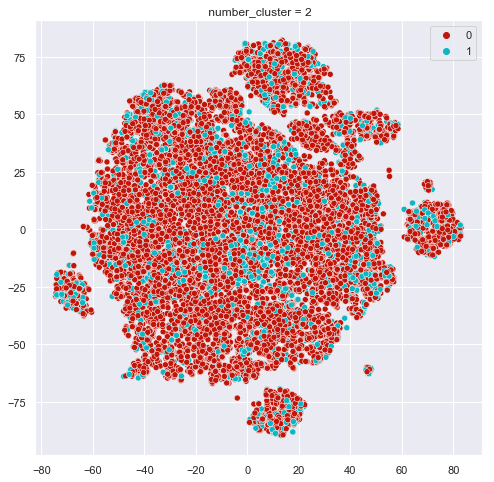

In [7]:
pca = PCA()
fit_pca = pca.fit(X)
X_pca = fit_pca.transform(X)

tsne = TSNE()
X_pca_tsne = tsne.fit_transform(X_pca) 

plot_cluster(hue_ag=y.open_account_flg.to_numpy(), X_arg=X_pca_tsne, number_cluster=2)

Посмотрим график каменистой осыпи.

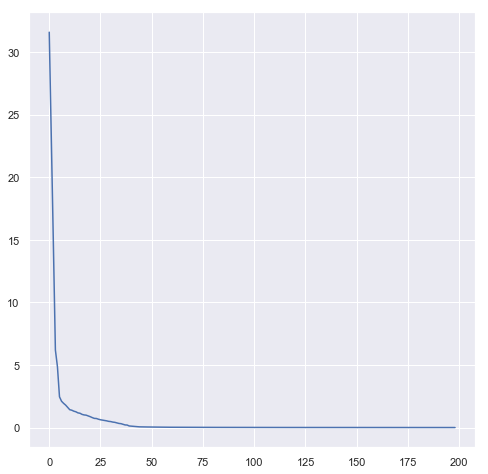

In [10]:
plt.plot(fit_pca.explained_variance_)

Согласно графику видно, что после 50 компонент изменение собственного значения не значительно

Определяю оптимальное число компонент, при котором будет максимум верно соотнесенных объектов к кластеру.
<br>Для этого использую алгоритм `KMeans` и метрику `confusion_matrix`

[3990]
[3990, 3981]
[3990, 3981, 4009]
[3990, 3981, 4009, 3947]
[3990, 3981, 4009, 3947, 3957]
[3990, 3981, 4009, 3947, 3957, 992]
[3990, 3981, 4009, 3947, 3957, 992, 3987]
[3990, 3981, 4009, 3947, 3957, 992, 3987, 3977]
[3990, 3981, 4009, 3947, 3957, 992, 3987, 3977, 3991]
[3990, 3981, 4009, 3947, 3957, 992, 3987, 3977, 3991, 1013]
[3990, 3981, 4009, 3947, 3957, 992, 3987, 3977, 3991, 1013, 3989]
[3990, 3981, 4009, 3947, 3957, 992, 3987, 3977, 3991, 1013, 3989, 4092]
[3990, 3981, 4009, 3947, 3957, 992, 3987, 3977, 3991, 1013, 3989, 4092, 4045]
[3990, 3981, 4009, 3947, 3957, 992, 3987, 3977, 3991, 1013, 3989, 4092, 4045, 850]
[3990, 3981, 4009, 3947, 3957, 992, 3987, 3977, 3991, 1013, 3989, 4092, 4045, 850, 3992]
[3990, 3981, 4009, 3947, 3957, 992, 3987, 3977, 3991, 1013, 3989, 4092, 4045, 850, 3992, 3991]
[3990, 3981, 4009, 3947, 3957, 992, 3987, 3977, 3991, 1013, 3989, 4092, 4045, 850, 3992, 3991, 967]
[3990, 3981, 4009, 3947, 3957, 992, 3987, 3977, 3991, 1013, 3989, 4092, 4045, 850,

Text(24.001, 4162.0005, '(24, 4162)')

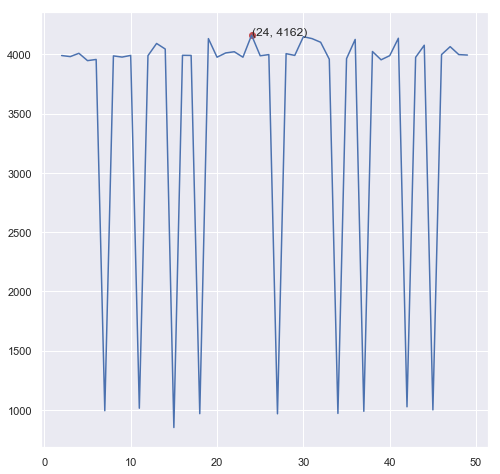

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
predicted_correct = []
ncomp = []
for i in range(2, 50):
    pca = PCA(n_components=i)
    fit_pca = pca.fit(X)
    X_pca = fit_pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
    km.fit(X=X_train, y=y_train)
    predict = km.predict(X_test)
    predicted_correct.append(confusion_matrix(y_pred=predict, y_true=y_test).trace())
    ncomp.append(i)
    print(predicted_correct)

optimal_number_components = ncomp[predicted_correct.index(max(predicted_correct))]
plt.plot(ncomp, predicted_correct)
plt.scatter(x=optimal_number_components, y=max(predicted_correct), marker='o', c='r')
plt.annotate(s='{label}'.format(label=(optimal_number_components, max(predicted_correct))),
                 xy=(optimal_number_components + 0.001, max(predicted_correct) + 0.0005))

Установив оптимальное число компонент применим его для `PCA` 

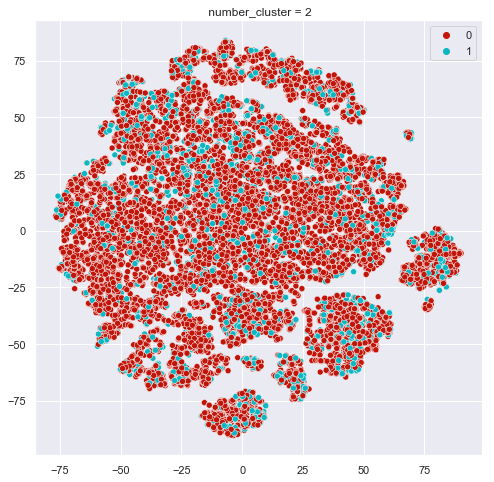

In [13]:
pca = PCA(n_components=optimal_number_components)
fit_pca = pca.fit(X)

X_pca = fit_pca.transform(X)
# X_pca_scaler = scaler.fit_transform(X_pca)

tsne = TSNE()
X_pca_tsne = tsne.fit_transform(X_pca) 

plot_cluster(hue_ag=y.open_account_flg.to_numpy(), X_arg=X_pca_tsne, number_cluster=2)

Далее `X_pca_scaler` используем в качестве данных при обучении алгоритмов, а `X_pca_tsne` используем для визуализации.

## Работа с алгоритмами

Посмотрим, как работают алгоритмы кластеризации.
В качестве тесовых алгоритмов рассмотрим:

1. K-Means;
2. Agglomerative clustering.
В рассматриваемых алгоритмах не установлено оптимальное число кластеров.
Выполняется только для предварительного ознакомления

### K-Means

Для KMeans и Agglomerative clustering, на данном этапе, не определено оптимальное число кластеров 

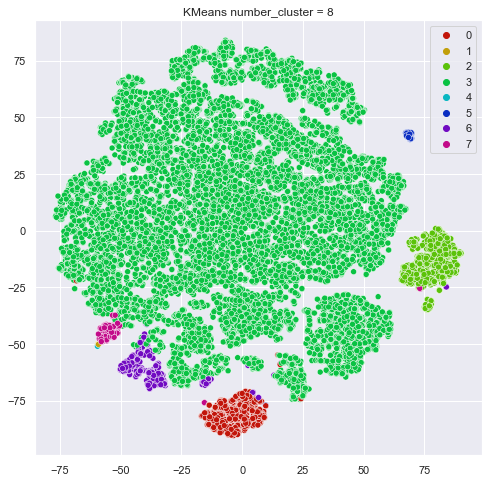

In [14]:
from sklearn.cluster import KMeans, AgglomerativeClustering

km = KMeans()

predict_km = km.fit_predict(X=X_pca)

plot_cluster(hue_ag=predict_km, number_cluster=km.n_clusters, X_arg=X_pca_tsne, name_alg_arg='KMeans')

### Agglomerative clustering

При первом запуске я получил `MemoryError`.
<br>Поэтому для дальнейшее работы с этим алгоритмом я уменьшу выборку.
<br>Для работы с этим алгоритмов выделим `X_agg` (4000 объектов) из основного тренировочного набора данных

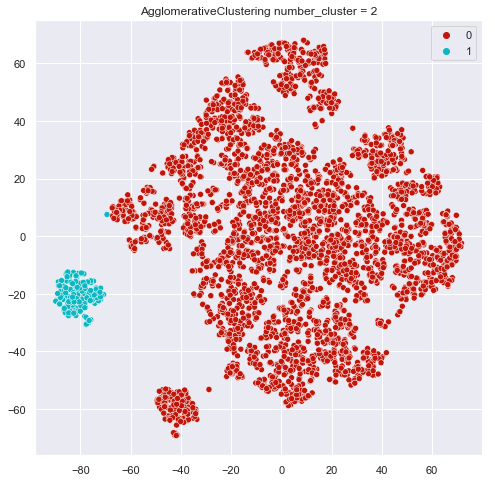

In [15]:
agg = AgglomerativeClustering()

X_agg = X_pca[:4000]
X_agg_tsne = tsne.fit_transform(X=X_agg)

predict_agg = agg.fit_predict(X=X_agg)
plot_cluster(hue_ag=predict_agg, number_cluster=agg.n_clusters, X_arg=X_agg_tsne, name_alg_arg='AgglomerativeClustering')

## Определим оптимальное число кластеров

Для определения оптимального числа кластеров алгоритмов использую  `silhouette_score`.
<br>Процесс поиска оптимального числа кластеров реализован в функции `fun_determine_optimal_number_clusters`.
<br>Функция принимает алгоритм, для которого ищется оптимальное число кластеров, данные на которых будет производится поиск, число определяющее предел поиска.
<br>`number_cluster` - переменная, в которой будет сохранено число кластеров. Она может использоваться в дальнейшем для этого алгоритма 

### Оптимальное число кластеров для KMeans 

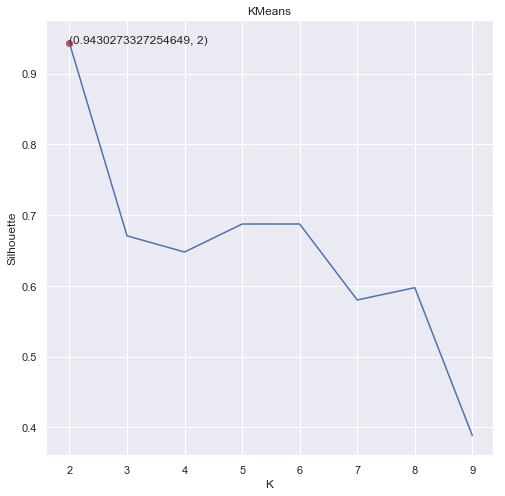

In [16]:
X_sil = X_train[:4000]

number_cluster_km = fun_determine_optimal_number_clusters(Alg_Clust=KMeans, X_arg=X_sil, p=10, name_alg='KMeans')

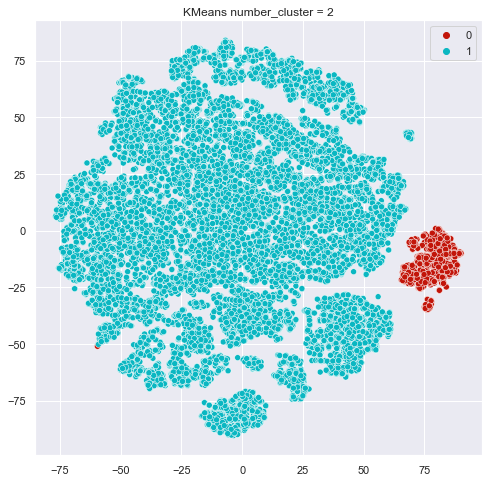

In [18]:
km = KMeans(n_clusters=number_cluster_km)
predict_km = km.fit_predict(X=X_pca)
plot_cluster(hue_ag=predict_km, X_arg=X_pca_tsne, number_cluster=km.n_clusters, name_alg_arg='KMeans')

### Оптимальное число кластеров для AgglomerativeClustering

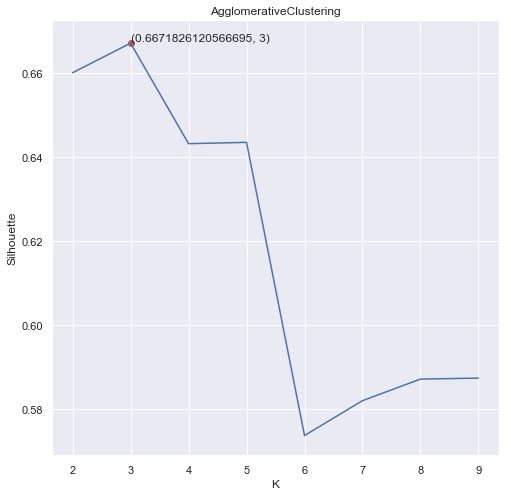

In [21]:
number_cluster_agg = fun_determine_optimal_number_clusters(Alg_Clust=AgglomerativeClustering,
                                                       X_arg=X_sil, p=10, name_alg='AgglomerativeClustering')

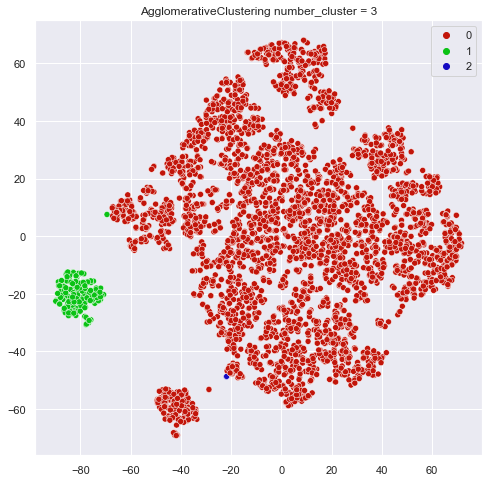

In [23]:
agg = AgglomerativeClustering(n_clusters=number_cluster_agg)

predict_agg = agg.fit_predict(X=X_agg)
plot_cluster(hue_ag=predict_agg, X_arg=X_agg_tsne, number_cluster=agg.n_clusters, name_alg_arg='AgglomerativeClustering')

In [29]:
silhouette_score_km = fun_silhouette_score(Alg_Clust=KMeans, X_arg=X_pca[:4000], p=15)
silhouette_score_agg = fun_silhouette_score(Alg_Clust=AgglomerativeClustering, X_arg=X_pca[:4000], p=15)

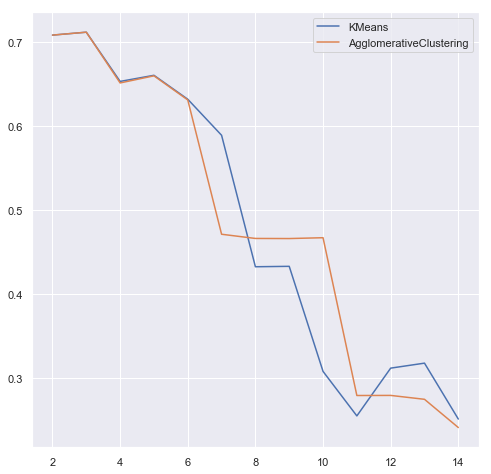

In [43]:
plot_x_km, plot_y_km = [i[0] for i in silhouette_score_km], [i[1] for i in silhouette_score_km]
plot_x_agg, plot_y_agg = [i[0] for i in silhouette_score_agg], [i[1] for i in silhouette_score_agg]
plt.plot(plot_y_km, plot_x_km, label='KMeans')
plt.plot(plot_y_agg, plot_x_agg, label='AgglomerativeClustering')
plt.legend(['KMeans','AgglomerativeClustering'])
plt.show()

In [51]:
from sklearn.metrics import v_measure_score
v_measure_score_list_k_means = []
v_measure_score_list_agglo = []
for i in range(2, 21):
    v_measure_score_list_k_means.append(v_measure_score(y.open_account_flg.to_numpy()[:4000],
                                                        KMeans(n_clusters=i, random_state=26).fit_predict(X_pca[:4000])))
    v_measure_score_list_agglo.append(v_measure_score(y.open_account_flg.to_numpy()[:4000],
                                                      AgglomerativeClustering(n_clusters=i).fit_predict(X_pca[:4000])))

In [52]:
v_measure_score_list_k_means

[1.4331523459743676e-08,
 0.00027810800958727433,
 0.0011083517686149146,
 0.0011601022676217521,
 0.001071464741105009,
 0.0013230723932627724,
 0.0010579334837444126,
 0.004113662882712292,
 0.003293722082713331,
 0.003628009010205117,
 0.0036368975915474634,
 0.003958730812052423,
 0.003926669699757658,
 0.003269002211031212,
 0.0037140541362927857,
 0.003656466272885981,
 0.003979903461936337,
 0.0039727039805474325,
 0.004098590984281995]

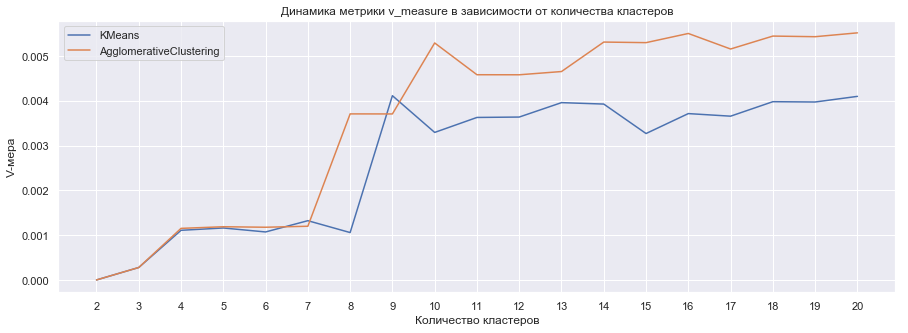

In [54]:
plt.figure(figsize=(15,5))
plt.plot(v_measure_score_list_k_means, label='KMeans')
plt.plot(v_measure_score_list_agglo, label='AgglomerativeClustering')
plt.xlabel('Количество кластеров')
plt.ylabel('V-мера')
plt.title('Динамика метрики v_measure в зависимости от количества кластеров')
plt.xticks(range(19), [i for i in range(2, 21)])
plt.legend()

# Тестирую как можно формировать клиентский профиль на данных без кластеризации

In [8]:
X

gender_M  gender_F   age  marital_status_WID  marital_status_UNM  \
0             1         0  34.0                   0                   0   
1             0         1  34.0                   0                   0   
2             1         0  32.0                   0                   0   
3             0         1  27.0                   0                   0   
4             1         0  45.0                   0                   0   
...         ...       ...   ...                 ...                 ...   
99995         1         0  25.0                   0                   0   
99996         0         1  43.0                   0                   0   
99997         1         0  31.0                   0                   0   
99998         0         1  21.0                   0                   1   
99999         0         1  28.0                   0                   0   

       marital_status_MAR  marital_status_DIV  marital_status_CIV  \
0                       1                   0                   0   
1                       1                   0                   0   
2                       1                   0                   0   
3                       1                   0                   0   
4                       1                   0                   0   
...                   ...                 ...                 ...   
99995                   1                   0                   0   
99996                   0                   1                   0   
99997                   1                   0                   0   
99998                   0                   0                   0   
99999                   1                   0                   0   

       job_position_WRP  job_position_WRK  ...  living_region_АСТРАХАНСКАЯ  \
0                     0                 0  ...                           0   
1                     0                 0  ...                           0   
2                     0                 0  ...                           0   
3                     0                 0  ...                           0   
4                     0                 0  ...                           0   
...                 ...               ...  ...                         ...   
99995                 0                 0  ...                           0   
99996                 0                 0  ...                           0   
99997                 0                 0  ...                           0   
99998                 0                 0  ...                           0   
99999                 0                 0  ...                           0   

       living_region_АРХАНГЕЛЬСКАЯ  living_region_АМУРСКАЯ  \
0                                0                       0   
1                                0                       0   
2                                0                       0   
3                                0                       0   
4                                0                       0   
...                            ...                     ...   
99995                            0                       0   
99996                            0                       0   
99997                            0                       0   
99998                            0                       0   
99999                            1                       0   

       living_region_АЛТАЙСКИЙ  living_region_АЛТАЙ  living_region_АДЫГЕЯ  \
0                            0                    0                     0   
1                            0                    0                     0   
2                            0                    0                     0   
3                            0                    0                     0   
4                            0                    0                     0   
...                        ...                  ...                   ...   
99995                        0                    0     

In [13]:
res = X.groupby(['gender_M', 'gender_F']).median()

In [69]:
res['education_ACD']

gender_M  gender_F
0         1           0
1         0           0
Name: education_ACD, dtype: int64

In [ ]:
# education_UGR
# education_SCH
# education_PGR
# education_GRD
# education_ACD

In [17]:
c = res.columns

In [36]:
c[0]

'age'

In [54]:
res.T[mas].T

age  marital_status_MAR  job_position_SPC  credit_sum  \
gender_M gender_F                                                           
0        1         36.0                 1.0               1.0     20828.0   
1        0         33.0                 1.0               1.0     21669.0   

                   credit_month  score_shk  education_SCH  monthly_income  \
gender_M gender_F                                                           
0        1                 10.0   0.463437            0.0         30000.0   
1        0                 10.0   0.459185            1.0         40000.0   

                   credit_count  
gender_M gender_F                
0        1                  2.0  
1        0                  2.0

In [41]:
np.any(pd.unique(res[c[0]].values) == 0)

False

In [71]:
mas = [np.any(pd.unique(res[i].values) != 0) for i in c]

In [72]:
continuous_variable_names

['age',
 'monthly_income',
 'credit_count',
 'overdue_credit_count',
 'credit_sum',
 'credit_month',
 'score_shk']

In [275]:
d1 = {i: lambda x: x.median()
     for i in X.columns.delete(loc=X.columns.get_indexer(['gender_M', 'gender_F'])) if (i in continuous_variable_names)}

In [276]:
d1

{'age': <function __main__.<dictcomp>.<lambda>(x)>,
 'credit_sum': <function __main__.<dictcomp>.<lambda>(x)>,
 'credit_month': <function __main__.<dictcomp>.<lambda>(x)>,
 'score_shk': <function __main__.<dictcomp>.<lambda>(x)>,
 'monthly_income': <function __main__.<dictcomp>.<lambda>(x)>,
 'credit_count': <function __main__.<dictcomp>.<lambda>(x)>,
 'overdue_credit_count': <function __main__.<dictcomp>.<lambda>(x)>}

In [277]:
d2= {i: lambda x: (x.sum()/len(x))*100
     for i in X.columns.delete(loc=X.columns.get_indexer(['gender_M', 'gender_F'])) if not i in continuous_variable_names}

In [278]:
d1.update(d2)

In [279]:
res2 = X.groupby(['gender_M', 'gender_F']).agg(d1)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  """Entry point for launching an IPython kernel.


In [280]:
# job_position_SPC

In [1]:
pd.options.display.max_rows = 168
res2.T

NameError: name 'pd' is not defined

## J(C) для KMeans

отдельный тетс для KMeans с большой выбокой!!!!

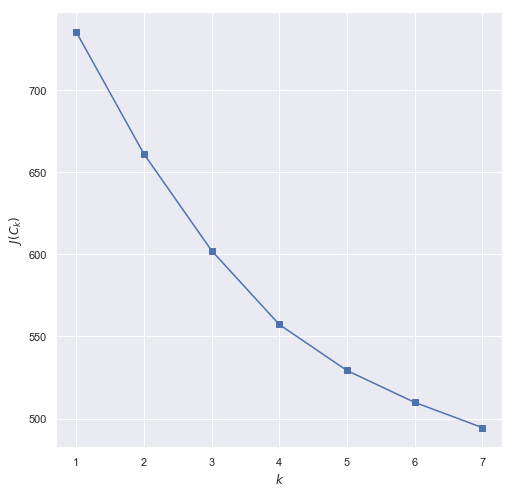

In [35]:
# inertia = []
# for k in range(1, 8):
#     kmeans = KMeans(n_clusters=k).fit(X_working_pca)
#     inertia.append(np.sqrt(kmeans.inertia_))

# plt.plot(range(1, 8), inertia, marker='s');
# plt.xlabel('$k$')
# plt.ylabel('$J(C_k)$');

## Предварительная оценка данных с применением TSNE и StandardScaler
<br>С помощью `tsne` выделены две компоненты. После чего произведена визуализация. </br>
<br>Предварительно смотрю как алгоритмы разделяют не стандартизированные  данные.</br>


### StandardScaler

<br>К бинарным данным не применяется стандартизация.
<br>Поэтому необходимо стандартизировать не весь X а только те данные которые имеют распределённые значение.
<br>Для этого есть функция `fun_standart_scaling` в которой стандартизация применяется к не бинарным признакам.
<br>Эта функция возвращает стандартизированные данные, объект `StandardScaler` и название не бинарных признаков  

In [5]:
X, scaler, not_binaries_features = fun_standart_scaling(X)

### TSNE и визуализация

`X_train_tsne` — это `X_train` после применения **tsne**.
<br>Представляет собой массив с 2 колонками, если `n_components = 2` (по умолчанию)
<br>`X_train_tsne` - объект array, shape = (number_obj, 2)
<br>визуализация набора данных с помощью функции `plot_cluster`

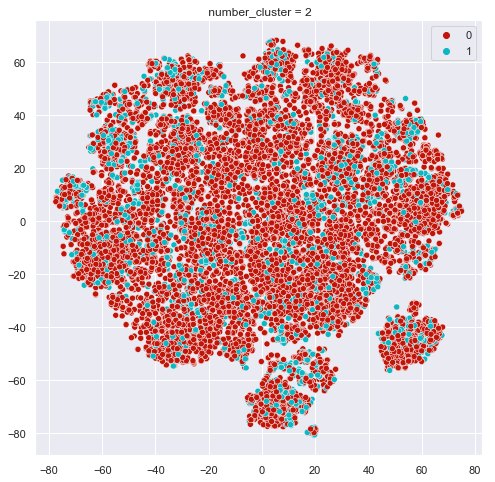

In [6]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X)
plot_cluster(hue_ag=y.open_account_flg.to_numpy(), X_arg=X_tsne, number_cluster=tsne.n_components)

## Алгоритмы кластеризации
Посмотрим, как работают алгоритмы кластеризации.
<br>В качестве тесовых алгоритмов рассмотрим:
    1. K-Means;
    2. Agglomerative clustering.
В рассматриваемых алгоритмах не установлено оптимальное число кластеров.
<br>Выполняется только для предварительного ознакомления

###  KMeans

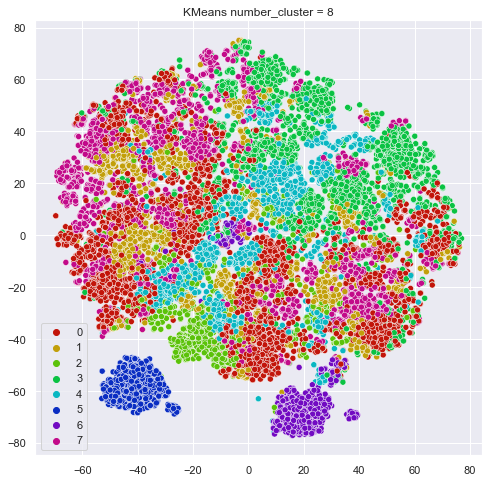

In [7]:
from sklearn.cluster import KMeans

# n_clusters = 8 (По умолчанию)
km = KMeans()
predict = km.fit_predict(X=X)
plot_cluster(hue_ag=predict, X_arg=X_tsne, number_cluster=km.n_clusters, name_alg_arg='KMeans')

<br>Можно заметить, что все кляссеры перемешались и очень близко расположены друг к другу.
<br>Полученный рисунок отображает кластеризацию c `n_clusters` = 8;
#### Посмотрим центры кластеров.
<br>Для того, чтобы провести обратную операцию стандартизации необходимо передать в метод `inverse_transform` данные, которые были **подвержены** стандартизации. Для этого у нас есть все необходимое.<br>Функция возвращает `fun_standart_scaling`: название признаков, которые были стандартизированы и сам объект `StandardScaler` 
<br>Операция вынесена в отдельную функцию `fun_reverse_standardization`


In [8]:
fun_reverse_standardization(scaler=scaler,
                            not_binaries_features=not_binaries_features,
                            data=pd.DataFrame(data=km.cluster_centers_, columns=data.columns[:-1]))

gender_M  gender_F        age  marital_status_WID  marital_status_UNM  \
0  0.508899  0.491101  32.030331            0.002724            0.292590   
1  0.421310  0.578690  39.676931            0.026393            0.179863   
2  0.707090  0.292910  37.925373            0.008396            0.166045   
3  0.534719  0.465281  29.772935            0.005322            0.479726   
4  0.499544  0.500456  32.243391            0.008660            0.420693   
5  0.475169  0.524831  37.406321            0.025959            0.265237   
6  0.448276  0.551724  36.812957            0.028213            0.292581   
7  0.333923  0.666077  51.539640            0.076628            0.191276   

   marital_status_MAR  marital_status_DIV  marital_status_CIV  \
0            0.602797            0.080094            0.021794   
1            0.613881            0.149071            0.030792   
2            0.716418            0.097015            0.012127   
3            0.407248            0.078561            0.029143   
4            0.461258            0.090702            0.018687   
5            0.585779            0.101580            0.021445   
6            0.535005            0.099269            0.044932   
7            0.572060            0.143531            0.016505   

   job_position_WRP  job_position_WRK  ...  living_region_АСТРАХАНСКАЯ  \
0     -4.130810e-17          0.002906  ...                    0.017254   
1      9.775171e-04          0.005865  ...                    0.012219   
2      1.865672e-03          0.000933  ...                    0.005597   
3     -3.773024e-17          0.005829  ...                    0.012671   
4     -2.764716e-17          0.002735  ...                    0.012762   
5      1.128668e-03          0.010158  ...                    0.015801   
6      1.044932e-03          0.006270  ...                    0.033438   
7      1.473622e-03          0.001768  ...                    0.016210   

   living_region_АРХАНГЕЛЬСКАЯ  living_region_АМУРСКАЯ  \
0                     0.011079                0.003632   
1                     0.012708                0.007820   
2                     0.014925                0.005597   
3                     0.008870                0.006589   
4                     0.008660                0.003646   
5                     0.005643                0.011287   
6                     0.004180                0.004180   
7                     0.010905                0.003537   

   living_region_АЛТАЙСКИЙ  living_region_АЛТАЙ  living_region_АДЫГЕЯ  \
0                 0.004359         3.632401e-04          2.179441e-03   
1                 0.004888         4.887586e-04          3.910068e-03   
2                 0.000933        -3.794708e-18          2.255141e-17   
3                 0.002027         1.376937e-17          5.575266e-03   
4                 0.000456         7.155734e-18          2.734731e-03   
5                 0.005643         1.128668e-03          3.386005e-03   
6                 0.004180        -3.577867e-18          1.044932e-03   
7                 0.003537         1.241411e-17          3.831418e-03   

   living_region_OTHER  monthly_income  credit_count  overdue_credit_count  
0             0.004177    35553.928987      1.613149          2.324529e-15  
1             0.002933    39457.089443      5.247801         -2.227385e-15  
2             0.000933   103721.082090      2.637127          2.798507e-03  
3             0.003294    32542.493411      1.377598          8.049117e-16  
4             0.005014    49953.245670      1.786235         -2.470246e-15  
5             0.004515    43384.604966      3.515801          1.006772e+00  
6             0.001045    36832.910136      2.277952          2.289835e-16  
7             0.004126    30310.000884      1.538756         -6.938894e-17  

[8 rows x 170 columns]

### Agglomerative clustering

Для того, чтоб использовать этот алгоритм необходимо уменьшить выборку данных.
<br>`X_agg` – это набор данных из X размеров в 5000 объектов 

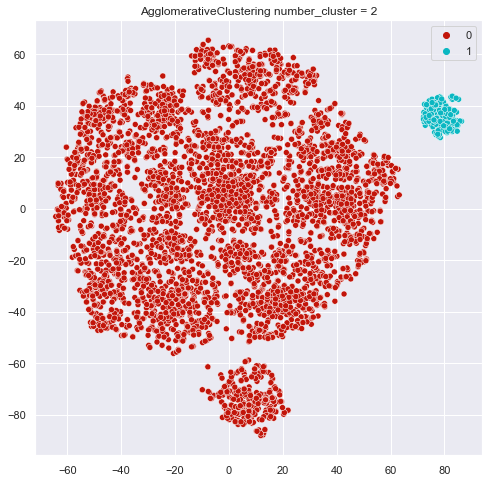

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import parallel_backend

X_agg = X.sample(n=5000)
X_agg_tsne = tsne.fit_transform(X_agg)
# n_clusters = 2 (По умолчанию)
agg = AgglomerativeClustering()
predict_agg = agg.fit_predict(X=X_agg)
plot_cluster(hue_ag=predict_agg, X_arg=X_agg_tsne, number_cluster=agg.n_clusters, name_alg_arg='AgglomerativeClustering')

установить тип класстеров!!!

In [12]:
agg.labels_

(5000,)

## Уменьшение размерности данных с помощью метода главных компонент

### PCA

`X_pca` - это X к которым был применен метод главных компонент.
<br>`X_pca_tsne` - это `X_pca`  для визуализации 

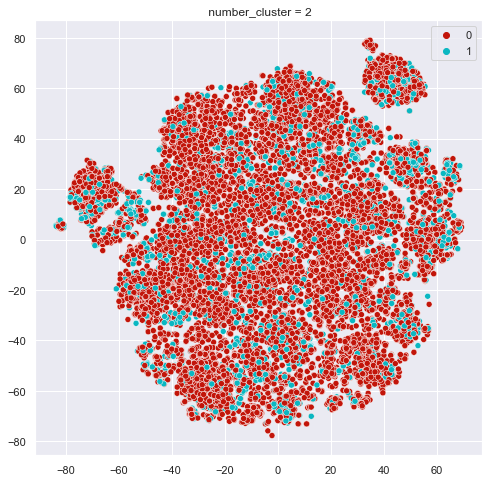

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
fit_pca = pca.fit(X)
X_pca = fit_pca.transform(X)
X_pca_tsne = tsne.fit_transform(X_pca) 
plot_cluster(hue_ag=y.open_account_flg.to_numpy(), X_arg=X_pca_tsne, number_cluster=2)

### KMeans на данных после PCA

Посмотрю, как повлияет применение `PCA` с настройками по умолчанию на процесс кластеризации для `KMeans`

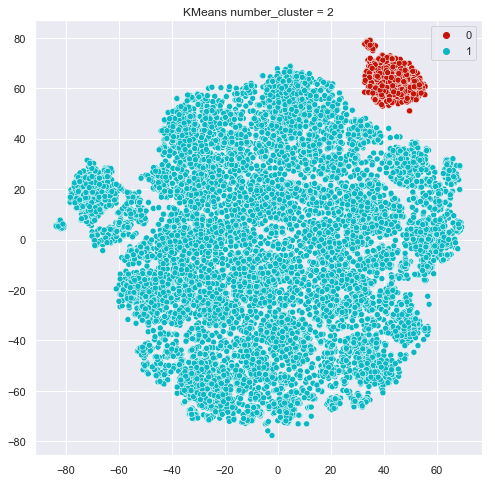

In [20]:
km = KMeans(n_clusters=number_cluster)

predict = km.fit_predict(X_pca)

plot_cluster(hue_ag=predict, X_arg=X_pca_tsne, name_alg_arg='KMeans',number_cluster=km.n_clusters)

Посмотрим график каменистой осыпи.

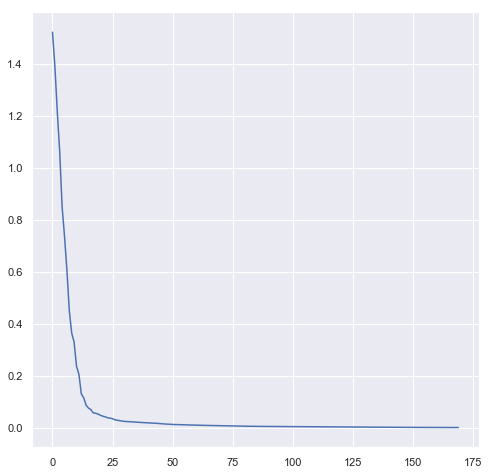

In [21]:
plt.plot(fit_pca.explained_variance_)

Согласно графику видно, что после 25 компонент изменение собственного значения не значительно

Определяю оптимальное число компонент, при котором будет максимум верно соотнесенных объектов к кластеру

[3138]
[3138, 3139]
[3138, 3139, 3146]
[3138, 3139, 3146, 1799]
[3138, 3139, 3146, 1799, 3993]
[3138, 3139, 3146, 1799, 3993, 4000]
[3138, 3139, 3146, 1799, 3993, 4000, 3145]
[3138, 3139, 3146, 1799, 3993, 4000, 3145, 1014]
[3138, 3139, 3146, 1799, 3993, 4000, 3145, 1014, 3995]
[3138, 3139, 3146, 1799, 3993, 4000, 3145, 1014, 3995, 4009]
[3138, 3139, 3146, 1799, 3993, 4000, 3145, 1014, 3995, 4009, 1005]
[3138, 3139, 3146, 1799, 3993, 4000, 3145, 1014, 3995, 4009, 1005, 1034]
[3138, 3139, 3146, 1799, 3993, 4000, 3145, 1014, 3995, 4009, 1005, 1034, 3970]
[3138, 3139, 3146, 1799, 3993, 4000, 3145, 1014, 3995, 4009, 1005, 1034, 3970, 3220]
[3138, 3139, 3146, 1799, 3993, 4000, 3145, 1014, 3995, 4009, 1005, 1034, 3970, 3220, 3286]
[3138, 3139, 3146, 1799, 3993, 4000, 3145, 1014, 3995, 4009, 1005, 1034, 3970, 3220, 3286, 4005]
[3138, 3139, 3146, 1799, 3993, 4000, 3145, 1014, 3995, 4009, 1005, 1034, 3970, 3220, 3286, 4005, 3958]
[3138, 3139, 3146, 1799, 3993, 4000, 3145, 1014, 3995, 4009, 1005

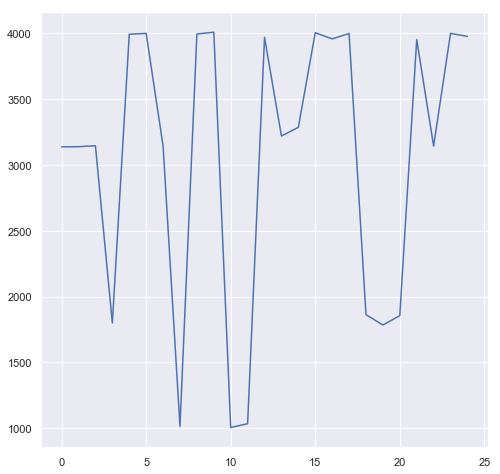

In [22]:
from sklearn.metrics import confusion_matrix
km = KMeans(n_clusters=number_cluster)
predicted_correct = []
ncomp = []
for i in range(2, 27):
    pca = PCA(n_components=i)
    fit_pca = pca.fit(X)
    X_pca = fit_pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
    km.fit(X=X_train, y=y_train)
    predict = km.predict(X_test)
    predicted_correct.append(confusion_matrix(y_pred=predict, y_true=y_test).trace())
    ncomp.append(i)
    print(predicted_correct)

plt.plot(predicted_correct)

In [23]:
optimal_number_components = ncomp[predicted_correct.index(max(predicted_correct))]
print(optimal_number_components)

11


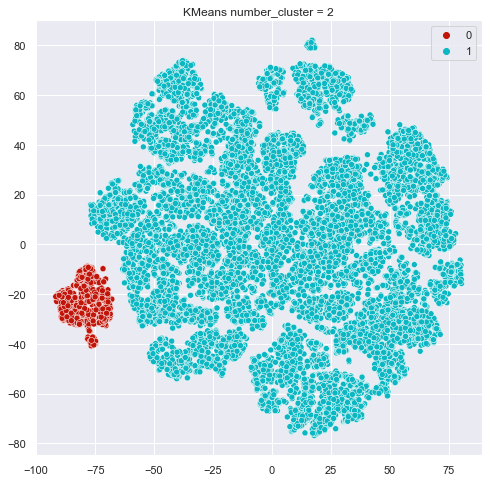

In [24]:
pca = PCA(n_components=optimal_number_components)
fit_pca = pca.fit(X)
X_pca = fit_pca.transform(X)

km = KMeans(n_clusters=number_cluster)
tsne = TSNE()
X_pca_tsne = tsne.fit_transform(X_pca)
predict = km.fit_predict(X=X_pca)

plot_cluster(hue_ag=predict, X_arg=X_pca_tsne, name_alg_arg='KMeans', number_cluster=km.n_clusters)

## PolynomialFeatures

Теперь посмотрим, как будет работать добавление новых features с помощью PolynomialFeatures

Разложение на полиномы будет применено только к не бинарным данным 

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_poly = pd.DataFrame(data=poly.fit_transform(X[not_binaries_features]), columns=poly.get_feature_names())

X.drop(columns=not_binaries_features, inplace=True)
for i in X_poly.columns:
    X[i] = X_poly[i].values
    
km = KMeans(n_clusters=2)

predict = km.fit_predict(X)

tsne = TSNE()
X_tsne = tsne.fit_transform(X)
plot_cluster(hue_ag=predict, X_arg=X_tsne, name_alg_arg='KMeans', number_cluster=2)

## Оценка качества классификации (Scoring Classification)

### confusion matrix

Пусть классификатор выдаёт метку класса. Используем принятые в этом блоге обозначения: yi – метка i-го объекта, ai – ответ на этом объекте нашего алгоритма, m – число объектов в выборке.

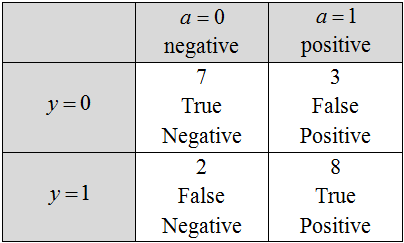

### accuracy_score

Классификационная оценка точности.
В простейшем случае такой метрикой может быть доля документов по которым классификатор принял правильное решение. 

Accuracy=P/N

где, P – количество документов по которым классификатор принял правильное решение, а N – размер обучающей выборки. Очевидное решение, на котором для начала можно остановиться.

sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

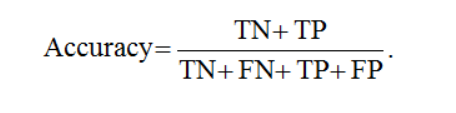